In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import cv2
from scipy import ndimage

In [7]:
root_dir = r'C:\Users\Ramzan\Documents\Self Supervised Learning'
images_dir = os.path.join(root_dir,'dataset','flowers') 
train_labels_path = os.path.join(root_dir,'dataset','annotations','flower_recognition_train.csv')
test_labels_path = os.path.join(root_dir,'dataset','annotations','flower_recognition_test.csv')

In [8]:
train_df = pd.read_csv(train_labels_path, usecols = ['FileName', "Label", "ClassName"])
test_df = pd.read_csv(test_labels_path, usecols = ['FileName', "Label", "ClassName"])

In [9]:
labels_to_class = {0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}
class_to_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [10]:
print(train_df.info())
print('-------------------------------------------------------')
print(test_df.info())
print('-------------------------------------------------------')
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FileName   4017 non-null   object
 1   Label      4017 non-null   int64 
 2   ClassName  4017 non-null   object
dtypes: int64(1), object(2)
memory usage: 94.3+ KB
None
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FileName   300 non-null    object
 1   Label      300 non-null    int64 
 2   ClassName  300 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB
None
-------------------------------------------------------


,FileName,Label,ClassName
0,C:\Users\Ramzan\Documents\Self Supervised Lear...,0,daisy
1,C:\Users\Ramzan\Documents\Self Supervised Lear...,0,daisy
2,C:\Users\Ramzan\Documents\Self Supervised Lear...,0,daisy
3,C:\Users\Ramzan\Documents\Self Supervised Lear...,0,daisy
4,C:\Users\Ramzan\Documents\Self Supervised Lear...,0,daisy


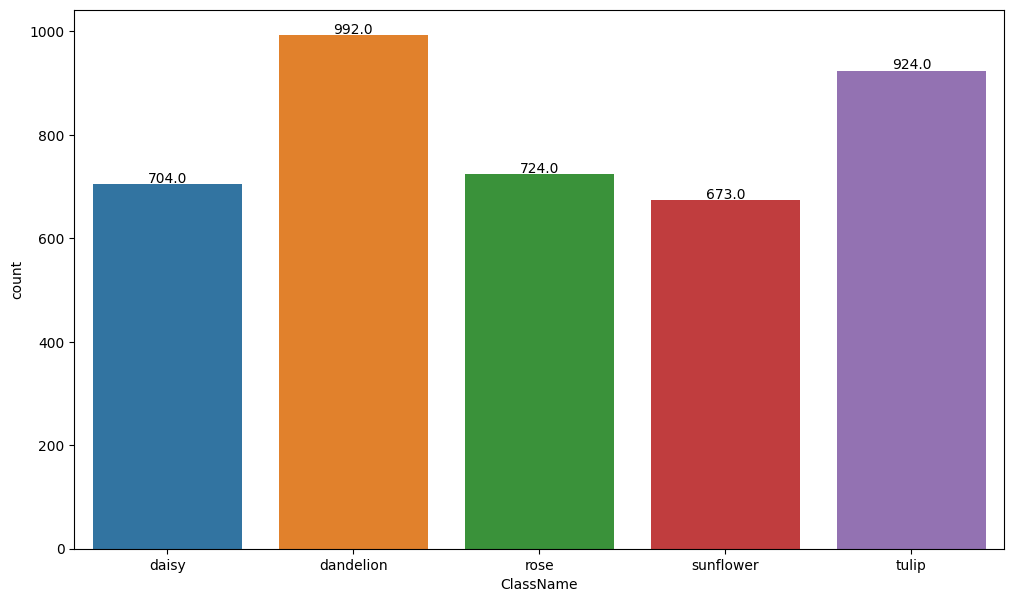

In [11]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data = train_df, x = 'ClassName')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3.5, f"{height}", ha="center")

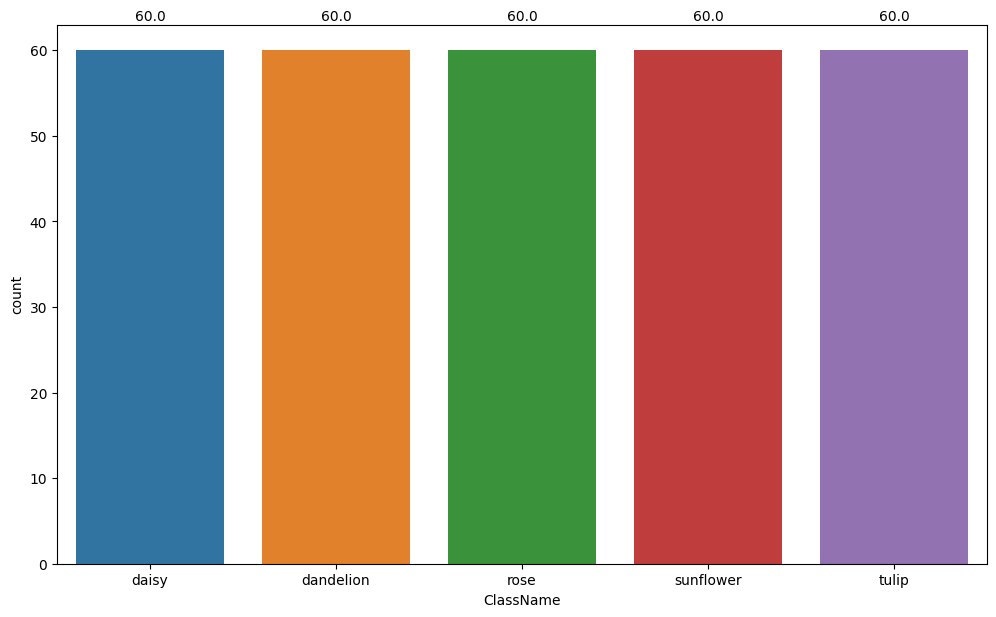

In [12]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data = test_df, x = 'ClassName')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3.5, f"{height}", ha="center")

In [21]:
idx = random.randint(0, len(train_df))
sample = train_df.iloc[idx]
print(sample[2])

sunflower


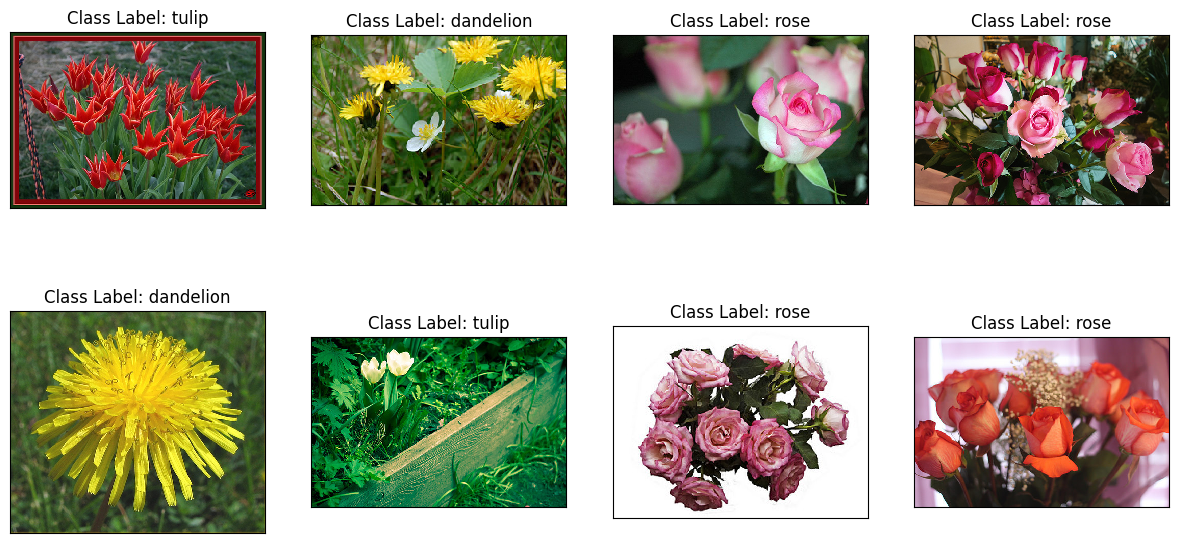

In [25]:
fig = plt.figure(1, figsize = (12, 12))
for i in range(8):
    idx = random.randint(0, len(train_df))
    sample = train_df.iloc[idx]
    x = cv2.imread(sample[0])
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    plt.imshow(x[:,:,::-1], interpolation='none')
    plt.title(f"Class Label: {sample[2]}")
    plt.xticks([])
    plt.yticks([])

In [26]:
def rotate_img(img, rot):
    if rot == 0:
        return img
    elif rot == 90:
        return ndimage.rotate(img, 90, reshape=False)
    elif rot == 180:
        return ndimage.rotate(img, 180, reshape=False)
    elif rot == 270:
        return ndimage.rotate(img, 270, reshape=False)
    elif rot == 120:
        return ndimage.rotate(img, 120, reshape=False)
    elif rot == 240:
        return ndimage.rotate(img, 240, reshape=False)
    else:
        raise ValueError('Rotation should be 0, 90, 120, 180, 240 or 270 degrees')

In [28]:
idx = random.randint(0, len(train_df))
sample = train_df.iloc[idx]
img_0 = cv2.imread(sample[0])
img_1 = rotate_img(img_0, 90)
img_2 = rotate_img(img_0, 120)
img_3 = rotate_img(img_0, 180)
img_4 = rotate_img(img_0, 240)
img_5 = rotate_img(img_0, 270)
img = [img_0, img_1, img_2, img_3, img_4, img_5]
img = np.array(img)
class_labels = ['0 - 0', '90 - 1', '120 - 2', '180 - 3', '240 - 4', '270 - 5']

In [29]:
img[0].shape

(333, 500, 3)

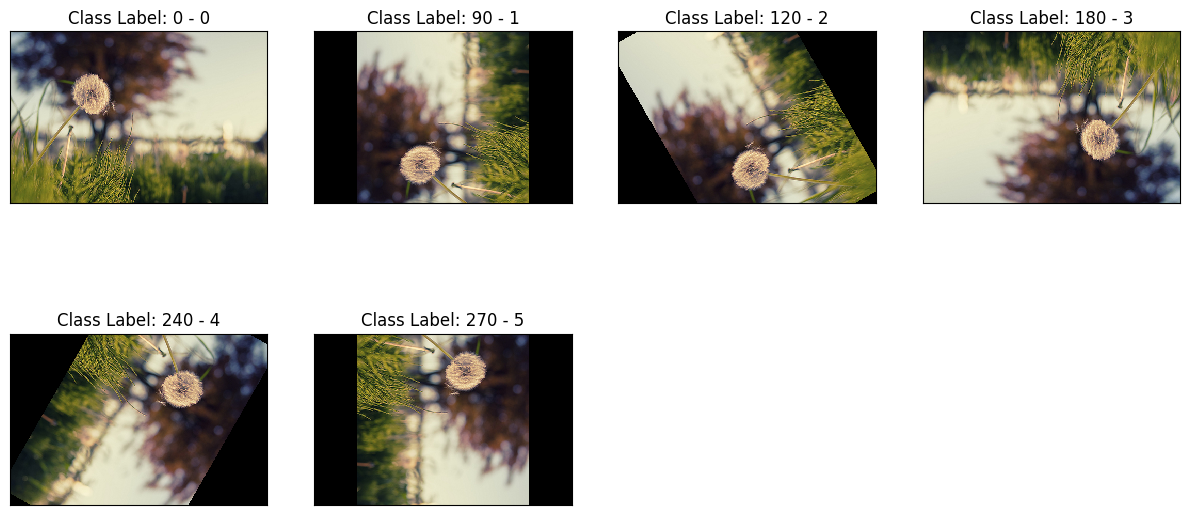

In [30]:
fig = plt.figure(1, figsize = (12,12))
for i in range(6):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    plt.imshow(img[i][:,:,::-1], interpolation = 'none')
    plt.title(f"Class Label: {class_labels[i]}")
    plt.xticks([])
    plt.yticks([])